In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_titanic=sns.load_dataset("titanic")


In [3]:
df_titanic
df_titanic.shape
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
type(df_titanic)

pandas.core.frame.DataFrame

In [5]:
#Get some statistics

df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Get a count of number of survivors
df_titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

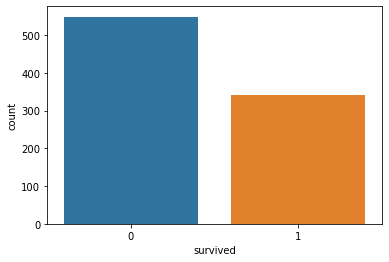

In [7]:
#Visualise the count of survivors
sns.countplot(df_titanic["survived"])

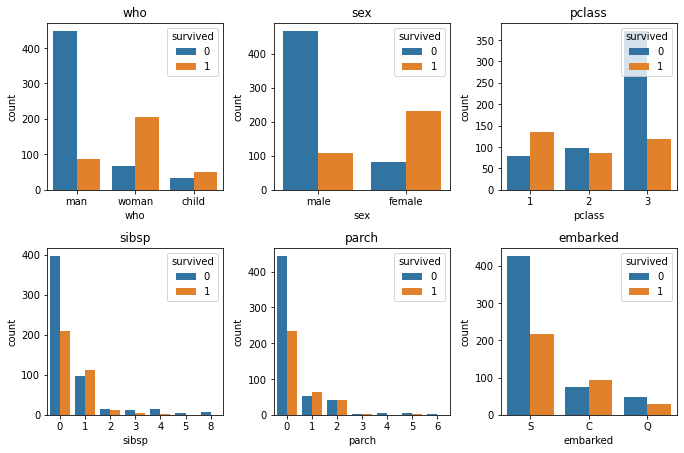

In [8]:
# Visualise count of survivors for columns "who", "sex", "pclass", "sibsp", "parch", "embarked"

cols=["who", "sex", "pclass", "sibsp", "parch", "embarked"]
n_rows=2
n_cols=3

#Create Subplot Grid and figure size of each graph

fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c # Index to go throgh number of columns
        ax=axs[r][c] #Shows where to position each subplot
        sns.countplot(df_titanic[cols[i]], hue=df_titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc="upper right")
        
plt.tight_layout()
        
#sns.countplot(df_titanic["who"])
#sns.countplot(df_titanic["sex"])

In [9]:
# Look at survival rate by sex

df_titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [10]:
# Look at survival rate by sex and class

df_titanic.pivot_table("survived",index="sex",columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


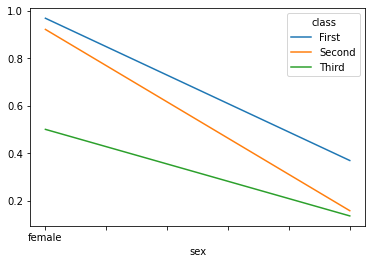

In [11]:
# Look at survival rate by sex and class visually

df_titanic.pivot_table("survived",index="sex",columns="class").plot()

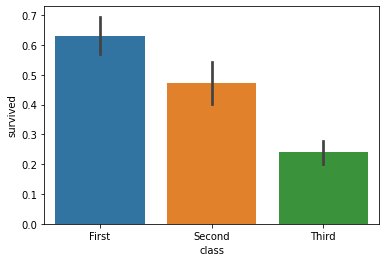

In [12]:
# Plot the survival rate of each class
sns.barplot(x="class", y="survived",data=df_titanic)

In [13]:
# Look at survival rate by sex, age and class

age=pd.cut(df_titanic["age"],[0,18,80])
df_titanic.pivot_table("survived",["sex",age],"class")

class              First     Second    Third 
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

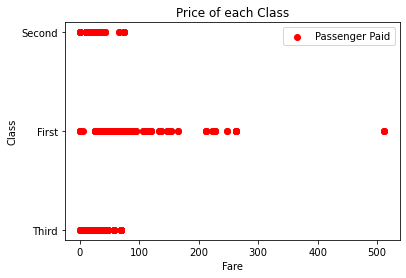

In [14]:
# Plot the prices for each class

plt.scatter(df_titanic["fare"],df_titanic["class"],color="red",label="Passenger Paid")
plt.xlabel("Fare")
plt.ylabel("Class")
plt.title("Price of each Class")
plt.legend()
plt.show()

In [15]:
# Count empty values in each column
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
# Look at the all of values in each column and get count

for val in df_titanic:
    print(df_titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
# To know the datatype of each column
print(df_titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [19]:
# Look into unique values for the columns that are to be transformed

print(df_titanic["sex"].unique())
print(df_titanic["embarked"].unique())
print(df_titanic["who"].unique())

['male' 'female']
['S' 'C' 'Q' nan]
['man' 'woman' 'child']


In [22]:
# Dropping reduntant columns
df_titanic=df_titanic.drop(["class","embark_town","deck","alive","alone","adult_male","who"],axis=1)

# Dropping rows with missing values
df_titanic=df_titanic.dropna(subset=["embarked","age"])

In [23]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
# Look at the data types
df_titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [27]:
# Look into unique values for the columns that are to be transformed

print(df_titanic["sex"].unique())
print(df_titanic["embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [28]:
#Importing scikit module
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#Encode Sex Column
df_titanic.iloc[:,2]=labelencoder.fit_transform(df_titanic.iloc[:,2].values)
df_titanic.iloc[:,7]=labelencoder.fit_transform(df_titanic.iloc[:,7].values)

#df_titanic["sex"]

In [29]:
df_titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [40]:
# Look into unique values for the columns that are to be transformed

print(df_titanic["sex"].unique())
print(df_titanic["embarked"].unique())

[1 0]
[2 0 1]


In [41]:
# Split the data into independent "X" and Dependent "Y"

X=df_titanic.iloc[:,1:8].values
Y=df_titanic.iloc[:,0].values
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [32]:
# Split the data set into 80% training and 20% test

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
# Scale the data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [34]:
# Create a function with many machine learning models
def models(X_train,Y_train):
    
    #Use logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    # Use K Nearest neighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
    knn.fit(X_train,Y_train)
    
    #Use Subvectorclassifier(SVC) (Linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,Y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy", random_state=0)
    forest.fit(X_train,Y_train)
    
    #Print training accurancy for each model
    print("[0] Logistic Regression Training Accuracy:",log.score(X_train,Y_train))
    print("[0] K Nearest Neighbour Training Accuracy:",knn.score(X_train,Y_train))
    print("[0] SVC Linear Training Accuracy:",svc_lin.score(X_train,Y_train))
    print("[0] SVC RBF Kernel Training Accuracy:",svc_rbf.score(X_train,Y_train))
    print("[0] Gaussian Naive Bayes Training Accuracy:",gauss.score(X_train,Y_train))
    print("[0] Decision Tree Training Accuracy:",tree.score(X_train,Y_train))
    print("[0] Random Forest Training Accuracy:",forest.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest



In [35]:
# Get and train all the models

model=models(X_train,Y_train)

[0] Logistic Regression Training Accuracy: 0.7978910369068541
[0] K Nearest Neighbour Training Accuracy: 0.8664323374340949
[0] SVC Linear Training Accuracy: 0.7768014059753954
[0] SVC RBF Kernel Training Accuracy: 0.8506151142355008
[0] Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[0] Decision Tree Training Accuracy: 0.9929701230228472
[0] Random Forest Training Accuracy: 0.9753954305799648


In [36]:
# Show the Confusion Matrix and accurancy for all the models on test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))
    
    # Extract True Negative, False Positive, False Negative, True Positive
    TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    test_score=(TN+TP)/(TN+FP+FN+TP)
    
    print(cm)
    print("Model[{}]Testing Accuracy={}".format(i,test_score))
    print()

[[75  7]
 [19 42]]
Model[0]Testing Accuracy=0.8181818181818182

[[67 15]
 [20 41]]
Model[1]Testing Accuracy=0.7552447552447552

[[70 12]
 [18 43]]
Model[2]Testing Accuracy=0.7902097902097902

[[75  7]
 [22 39]]
Model[3]Testing Accuracy=0.7972027972027972

[[69 13]
 [27 34]]
Model[4]Testing Accuracy=0.7202797202797203

[[54 28]
 [12 49]]
Model[5]Testing Accuracy=0.7202797202797203

[[73  9]
 [14 47]]
Model[6]Testing Accuracy=0.8391608391608392



In [37]:
# Get Feature importance
forest=model[6]
importances=pd.DataFrame({"Feature":df_titanic.iloc[:,1:8].columns, "Importance":np.round(forest.feature_importances_,3)})
importances=importances.sort_values("Importance",ascending=False).set_index("Feature")
importances

,Importance
Feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


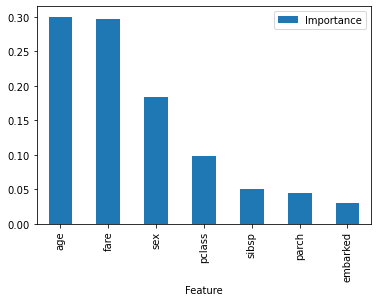

In [38]:
# Visualise the importances

importances.plot.bar()

In [39]:
#Print the prediction of Random Forest Classifier Model

pred=model[6].predict(X_test)
print(pred)

print()

#Print Actual Values

print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [48]:
df_titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [55]:
#My Survival
my_survival=[[1,0,21,1,0,400,0]]

# Scaling my Survival
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled=sc.fit_transform(my_survival)


#Print prediction of my survival using Random Forest Classifier

pred=model[6].predict(my_survival_scaled)
print(pred)

[0]
